In [1]:
#Notebook is running in tmux
import socket
hostname = socket.gethostname()
from VarInfo import GetVarInfo
print(hostname)

cmslpc125.fnal.gov


In [2]:
import ROOT
import numpy
from ROOT import TMVA
from array import array

Welcome to JupyROOT 6.12/07


In [3]:
sigMass = "M1200"
#inputFileS = ROOT.TFile("sig_1000.root")
dirNtuple = "root://cmseos.fnal.gov//store/user/rverma/Output/cms-TT-run2/Ntuple_Skim/"
dirFile = "2016/Semilep/JetBase/"
sigFile = "Semilep_JetBase__TstarTstarToTgammaTgluon_%s_2016_Ntuple.root"%sigMass
inputFileS = ROOT.TFile.Open("%s/%s/%s"%(dirNtuple, dirFile, sigFile))
sig = inputFileS.Get("AnalysisTree")

bkg = ROOT.TChain("AnalysisTree")
bkgList = ["TTGamma_SingleLept", 
           "TTGamma_Dilepton", 
           "TTGamma_Hadronic", 
           "TTGamma_SingleLept_Pt100", 
           "TTGamma_Dilepton_Pt100", 
           "TTGamma_Hadronic_Pt100",
           "TTGamma_SingleLept_Pt200", 
           "TTGamma_Dilepton_Pt200",
           "TTGamma_Hadronic_Pt200"
          ]
for b in bkgList:
    fPath = "%s/%s/Semilep_JetBase__%s_2016_Ntuple.root"%(dirNtuple, dirFile, b)
    bkg.Add(fPath)
print(bkg.GetEntries())

4749951


In [4]:
methodName = "BDTG_%s"%sigMass
weightfile = "dataset/weights/TMVA_TT_Classification_" + methodName + ".weights.xml"

ROOT.TMVA.Tools.Instance()
reader = TMVA.Reader("!Color:!Silent")

vars = GetVarInfo()
#Convert strings to variables
for var in vars.keys():
    exec('%s = %s'%(var, array('f',[0])))
    print('%s = %s'%(var, eval(var)))
Weight_lumi = array('f',[0])

print("\nTotal vars = %s\n"%len(vars.keys()))
for var in vars.keys():
    reader.AddVariable(vars[var][0], eval(var))
reader.BookMVA(methodName, weightfile)

Reco_mass_trans_w = array('f', [0.0])
Photon_eta = array('f', [0.0])
Muon_iso = array('f', [0.0])
Reco_st = array('f', [0.0])
Reco_ht = array('f', [0.0])
Photon_et = array('f', [0.0])
Jet_pt = array('f', [0.0])
FatJet_size = array('f', [0.0])
Reco_met = array('f', [0.0])
Muon_phi = array('f', [0.0])
Photon_h_over_e = array('f', [0.0])
Photon_sieie = array('f', [0.0])
Jet_eta = array('f', [0.0])
Reco_dr_photon_jet = array('f', [0.0])
Photon_phi = array('f', [0.0])
Reco_dr_photon_lepton = array('f', [0.0])
Muon_pt = array('f', [0.0])
Jet_b_size = array('f', [0.0])
Jet_size = array('f', [0.0])
Muon_eta = array('f', [0.0])
Reco_mass_lgamma = array('f', [0.0])
Reco_mass_TT = array('f', [0.0])
Reco_chi2 = array('f', [0.0])
Reco_mass_T = array('f', [0.0])

Total vars = 24



<ROOT.TMVA::MethodBDT object ("BDTG_M1200") at 0x9c439e0>

                         : Booking "BDTG_M1200" of type "BDT" from dataset/weights/TMVA_TT_Classification_BDTG_M1200.weights.xml.
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDTG_M1200" of type: "BDT"


In [5]:
#Declare histograms
hSig_disc = ROOT.TH1D("Disc","Disc",20,-1,1)
hBkg_disc = ROOT.TH1D("Disc","Disc",20,-1,1)
for var in vars.keys():
    nBins  = vars[var][1][0]
    xMin   = vars[var][1][1]
    xMax   = vars[var][1][2]
    cut = ["", "_cut"]
    for cut in cut:
        histSig = 'ROOT.TH1D("%s%s", "%s%s", %s, %s, %s)'%(var, cut, var, cut, nBins, xMin, xMax)
        histBkg = 'ROOT.TH1D("%s%s", "%s%s", %s, %s, %s)'%(var, cut, var, cut, nBins, xMin, xMax)
        exec("hSig_%s%s = %s"%(var, cut, histSig))
        exec("hBkg_%s%s = %s"%(var, cut, histBkg))
        print("hBkg_%s%s = %s"%(var, cut, histBkg))

#Fill hists for signal
print("\nRunning for Sig...\n") 
for ievt, e in enumerate(sig):
    eventSel = int(e.Event_pass_presel_mu and ((e.Jet_size>=5 and e.FatJet_size==0) or (e.Jet_size>=2 and e.FatJet_size==1))  and e.Jet_b_size >=1 and e.Photon_size==1 and e.Photon_et[0] > 100)
    if eventSel>0:
        for var in vars.keys():
            exec("%s[0] = e.%s"%(var, vars[var][0]))
            exec("hSig_%s.Fill(e.%s, e.Weight_lumi)"%(var, vars[var][0]))
        disc = reader.EvaluateMVA(methodName)
        hSig_disc.Fill(disc, e.Weight_lumi)
        if disc>0:
            for var in vars.keys():
                exec("hSig_%s_cut.Fill(e.%s, e.Weight_lumi)"%(var, vars[var][0]))
                pass
        if (ievt%100)==0:
            print('Event = %i/%i, Disc = %s'%(ievt, sig.GetEntries(), disc))
            
#Fill hists for background
print("\nRunning for Bkg...\n")    
for ievt, e in enumerate(bkg):
    eventSel = int(e.Event_pass_presel_mu and ((e.Jet_size>=5 and e.FatJet_size==0) or (e.Jet_size>=2 and e.FatJet_size==1))  and e.Jet_b_size >=1 and e.Photon_size==1 and e.Photon_et[0] > 100)
    if eventSel>0:
        for var in vars.keys():
            exec("%s[0] = e.%s"%(var, vars[var][0]))
            exec("hBkg_%s.Fill(e.%s, e.Weight_lumi)"%(var, vars[var][0]))
        disc = reader.EvaluateMVA(methodName)
        hBkg_disc.Fill(disc, e.Weight_lumi)
        if disc>0:
            for var in vars.keys():
                exec("hBkg_%s_cut.Fill(e.%s, e.Weight_lumi)"%(var, vars[var][0]))
        if (ievt%1000)==0:
            progress = "%s%s"%(100*ievt/bkg.GetEntries(), "%")
            print('Event(%s) = %i/%i, Disc = %s'%(progress, ievt, bkg.GetEntries(), disc)) 

hBkg_Reco_mass_trans_w = ROOT.TH1D("Reco_mass_trans_w", "Reco_mass_trans_w", 30, 0, 600)
hBkg_Reco_mass_trans_w_cut = ROOT.TH1D("Reco_mass_trans_w_cut", "Reco_mass_trans_w_cut", 30, 0, 600)
hBkg_Photon_eta = ROOT.TH1D("Photon_eta", "Photon_eta", 12, -2.88, 2.88)
hBkg_Photon_eta_cut = ROOT.TH1D("Photon_eta_cut", "Photon_eta_cut", 12, -2.88, 2.88)
hBkg_Muon_iso = ROOT.TH1D("Muon_iso", "Muon_iso", 10, 0, 1.0)
hBkg_Muon_iso_cut = ROOT.TH1D("Muon_iso_cut", "Muon_iso_cut", 10, 0, 1.0)
hBkg_Reco_st = ROOT.TH1D("Reco_st", "Reco_st", 300, 0, 9000)
hBkg_Reco_st_cut = ROOT.TH1D("Reco_st_cut", "Reco_st_cut", 300, 0, 9000)
hBkg_Reco_ht = ROOT.TH1D("Reco_ht", "Reco_ht", 300, 0, 9000)
hBkg_Reco_ht_cut = ROOT.TH1D("Reco_ht_cut", "Reco_ht_cut", 300, 0, 9000)
hBkg_Photon_et = ROOT.TH1D("Photon_et", "Photon_et", 100, 0, 2000)
hBkg_Photon_et_cut = ROOT.TH1D("Photon_et_cut", "Photon_et_cut", 100, 0, 2000)
hBkg_Jet_pt = ROOT.TH1D("Jet_pt", "Jet_pt", 30, -20, 1480)
hBkg_Jet_pt_cut = ROOT.TH1D("Jet_pt_cut", "

Event(80%) = 3838000/4749951, Disc = -0.967400710893
Event(80%) = 3839000/4749951, Disc = -0.100567517141
Event(81%) = 3881000/4749951, Disc = -0.955230217306
Event(81%) = 3886000/4749951, Disc = -0.980102223505
Event(81%) = 3889000/4749951, Disc = -0.880808643548
Event(82%) = 3924000/4749951, Disc = 0.961259844398
Event(82%) = 3942000/4749951, Disc = -0.980213992577
Event(83%) = 3974000/4749951, Disc = -0.978099649627
Event(83%) = 3981000/4749951, Disc = -0.980706400184
Event(83%) = 3986000/4749951, Disc = -0.980705423985
Event(84%) = 4018000/4749951, Disc = -0.980726434739
Event(85%) = 4039000/4749951, Disc = -0.975077548984
Event(85%) = 4049000/4749951, Disc = -0.977854651306
Event(85%) = 4053000/4749951, Disc = -0.96484509392
Event(85%) = 4055000/4749951, Disc = -0.980424073834
Event(85%) = 4076000/4749951, Disc = -0.980071229015
Event(85%) = 4080000/4749951, Disc = -0.981180309416
Event(85%) = 4081000/4749951, Disc = -0.980952611539
Event(86%) = 4091000/4749951, Disc = -0.98043487

Warning in <TNetXNGFile::Append>: Replacing existing TH1: Disc (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Reco_mass_trans_w (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Reco_mass_trans_w_cut (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Photon_eta (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Photon_eta_cut (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Muon_iso (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Muon_iso_cut (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Reco_st (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Reco_st_cut (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: Reco_ht (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing exist

In [6]:
def decoHist(hist, xTit, yTit, color):
    hist.GetXaxis().SetTitle(xTit);
    hist.GetYaxis().SetTitle(yTit);
    hist.SetFillColor(color);
    hist.GetXaxis().SetTitle(xTit);
    hist.GetYaxis().SetTitle(yTit)
    hist.GetYaxis().CenterTitle()
    hist.SetLineColor(color)
    hist.SetLineWidth(2)
    hist.GetXaxis().SetTitleOffset(1.0)
    hist.GetYaxis().SetTitleOffset(1.0)
    hist.GetXaxis().SetTitleSize(0.05);
    hist.GetYaxis().SetTitleSize(0.05);
    hist.GetXaxis().SetTitleSize(0.05);
    hist.GetYaxis().SetTitleSize(0.05);

In [7]:
len(vars.keys())

24

('Total variables = ', 24)
['Reco_mass_trans_w', 'Photon_eta', 'Muon_iso', 'Reco_st']
['Reco_ht', 'Photon_et', 'Jet_pt', 'FatJet_size']
['Reco_met', 'Muon_phi', 'Photon_h_over_e', 'Photon_sieie']
['Jet_eta', 'Reco_dr_photon_jet', 'Photon_phi', 'Reco_dr_photon_lepton']
['Muon_pt', 'Jet_b_size', 'Jet_size', 'Muon_eta']
['Reco_mass_lgamma', 'Reco_mass_TT', 'Reco_chi2', 'Reco_mass_T']


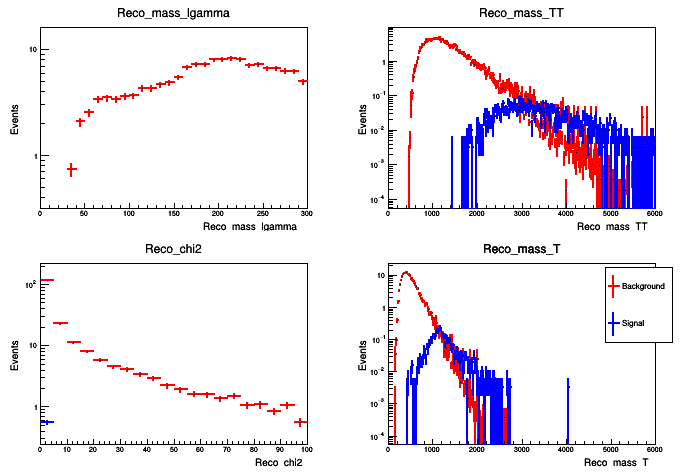

In [8]:
n = 4 # number of Plots in one canvas
N = len(vars.keys())
print("Total variables = ", N)
for i in range(N/n):
    plots = vars.keys()[n*i:n*(i+1)]
    print(plots)
    c = ROOT.TCanvas()
    ROOT.gPad.Draw()
    c.Divide(n/2, n/2)
    for i, var in enumerate(plots):    
        c.cd(i+1)
        ROOT.gPad.SetLogy(True)
        ROOT.gStyle.SetOptStat(0)
        exec("decoHist(hBkg_%s, \"%s\", \"Events\", 2)"%(var, var))
        exec("decoHist(hSig_%s, \"%s\", \"Events\", 4)"%(var, var))
        exec("hBkg_%s.Draw()"%var)
        exec("hSig_%s.Draw(\"SAME\")"%var)
        leg = ROOT.TLegend(0.75,0.55,0.95,0.88)
        exec("leg.AddEntry(hBkg_%s, \"Background\", \"PEL\")"%var)
        exec("leg.AddEntry(hSig_%s, \"Signal\", \"PEL\")"%var)
        leg.Draw("SAME")

In [9]:
ROOT.gPad.Draw()
hSig_Jet_eta.Draw()

In [10]:
hSig_Jet_eta.Integral()

4.737712858244777

In [11]:
%jsroot on

c = ROOT.TCanvas("a", "a", 1000, 1000)
ROOT.gPad.Draw()
c.Divide(4, 6)
for i, var in enumerate(vars.keys()):    
    c.cd(i+1)
    print(i, var)
    ROOT.gPad.SetLogy(True)
    ROOT.gStyle.SetOptStat(0)
    exec("decoHist(hBkg_%s, \"%s\", \"Events\", 2)"%(var, var))
    exec("decoHist(hSig_%s, \"%s\", \"Events\", 4)"%(var, var))
    exec("hBkg_%s.Draw()"%var)
    exec("hSig_%s.Draw(\"SAME\")"%var)
    leg = ROOT.TLegend(0.75,0.55,0.95,0.88)
    exec("leg.AddEntry(hBkg_%s, \"Background\", \"PEL\")"%var)
    exec("leg.AddEntry(hSig_%s, \"Signal\", \"PEL\")"%var)
    leg.Draw("SAME")

(0, 'Reco_mass_trans_w')
(1, 'Photon_eta')
(2, 'Muon_iso')
(3, 'Reco_st')
(4, 'Reco_ht')
(5, 'Photon_et')
(6, 'Jet_pt')
(7, 'FatJet_size')
(8, 'Reco_met')
(9, 'Muon_phi')
(10, 'Photon_h_over_e')
(11, 'Photon_sieie')
(12, 'Jet_eta')
(13, 'Reco_dr_photon_jet')
(14, 'Photon_phi')
(15, 'Reco_dr_photon_lepton')
(16, 'Muon_pt')
(17, 'Jet_b_size')
(18, 'Jet_size')
(19, 'Muon_eta')
(20, 'Reco_mass_lgamma')
(21, 'Reco_mass_TT')
(22, 'Reco_chi2')
(23, 'Reco_mass_T')


In [12]:
#%jsroot on
c2 = ROOT.TCanvas()
c2.cd()
ROOT.gPad.SetLogy(True)
ROOT.gPad.Draw()
#hSig_disc.Scale(20)
hBkg_disc.SetLineColor(2)
hSig_disc.SetLineWidth(2)
hSig_disc.GetYaxis().SetRangeUser(0, 100)
hSig_disc.Draw()
hBkg_disc.SetLineWidth(2)
hBkg_disc.Draw("SAME")

In [13]:
%jsroot on
c = ROOT.TCanvas("b", "b", 1000, 1000)
ROOT.gPad.Draw()
c.Divide(4, 6)
for i, var in enumerate(vars.keys()):    
    c.cd(i+1)
    print(i, var)
    ROOT.gPad.SetLogy(True)
    ROOT.gStyle.SetOptStat(0)
    exec("decoHist(hBkg_%s_cut, \"%s\", \"Events\", 2)"%(var, var))
    exec("decoHist(hSig_%s_cut, \"%s\", \"Events\", 4)"%(var, var))
    exec("hBkg_%s_cut.Draw()"%var)
    exec("hSig_%s_cut.Draw(\"SAME\")"%var)
    leg = ROOT.TLegend(0.75,0.55,0.95,0.88)
    exec("leg.AddEntry(hBkg_%s_cut, \"Background\", \"PEL\")"%var)
    exec("leg.AddEntry(hSig_%s_cut, \"Signal\", \"PEL\")"%var)
    leg.Draw("SAME")

(0, 'Reco_mass_trans_w')
(1, 'Photon_eta')
(2, 'Muon_iso')
(3, 'Reco_st')
(4, 'Reco_ht')
(5, 'Photon_et')
(6, 'Jet_pt')
(7, 'FatJet_size')
(8, 'Reco_met')
(9, 'Muon_phi')
(10, 'Photon_h_over_e')
(11, 'Photon_sieie')
(12, 'Jet_eta')
(13, 'Reco_dr_photon_jet')
(14, 'Photon_phi')
(15, 'Reco_dr_photon_lepton')
(16, 'Muon_pt')
(17, 'Jet_b_size')
(18, 'Jet_size')
(19, 'Muon_eta')
(20, 'Reco_mass_lgamma')
(21, 'Reco_mass_TT')
(22, 'Reco_chi2')
(23, 'Reco_mass_T')


In [14]:
outputFile = ROOT.TFile("Disc_Ntuple_%s.root"%sigMass,"RECREATE")
CR = "ttyg_Enriched_SR"

dictRebin = {}
dictRebin["Reco_mass_T"] = numpy.array([0,200,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1800.,2500.,6000.])
dictRebin["Photon_et"]   = numpy.array([0,100,200,300,400,500,600,700,900,1200,2000.])
dictRebin["Reco_ht"]     = numpy.array([0,500,700,900,1100,1300,1500,1700,1900,2200,2500,3000,5000,9000.])
dictRebin["Reco_st"]     = numpy.array([0,500,700,900,1100,1300,1500,1700,1900,2200,2500,3000,5000,9000.])

def getHistDir(sample, sysType, CR):
    histDir = "%s/%s/%s"%(sample, CR, sysType)
    return histDir

def writeHist(hist, procDir, outputFile):
    outHistDir = getHistDir(procDir, "Base", CR)
    if not outputFile.GetDirectory(outHistDir):
        outputFile.mkdir(outHistDir)
    outputFile.cd(outHistDir)
    hName = hist.GetName()
    ROOT.gDirectory.Delete("%s;*"%(hName))
    print "%20s, %10s, %10s"%(hName, procDir, round(hist.Integral()))
    if hName in dictRebin.keys():
        hNew = hist.Rebin(len(dictRebin[hName])-1, hName, dictRebin[hName]) 
        hNew.Write()
    else:
        hist.Write()

writeList = []
writeList.append([hSig_disc, "Sig", "Base"])
writeList.append([hBkg_disc, "Bkg", "Base"])

for var in vars.keys():
    exec("writeList.append([hSig_%s, \"Sig\", \"Base\"])"%var)
    exec("writeList.append([hBkg_%s, \"Bkg\", \"Base\"])"%var)
    exec("writeList.append([hSig_%s_cut, \"Sig\", \"Base\"])"%var)
    exec("writeList.append([hBkg_%s_cut, \"Bkg\", \"Base\"])"%var)

for write in writeList:
    writeHist(write[0], write[1], outputFile)
    if "Bkg" in write[1]:
        writeHist(write[0], "data_obs", outputFile)
#outputFile.ls()
outputFile.Close()

                Disc,        Sig,        5.0
                Disc,        Bkg,      206.0
                Disc,   data_obs,      206.0
   Reco_mass_trans_w,        Sig,        5.0
   Reco_mass_trans_w,        Bkg,      206.0
   Reco_mass_trans_w,   data_obs,      206.0
Reco_mass_trans_w_cut,        Sig,        5.0
Reco_mass_trans_w_cut,        Bkg,        4.0
Reco_mass_trans_w_cut,   data_obs,        4.0
          Photon_eta,        Sig,        5.0
          Photon_eta,        Bkg,      206.0
          Photon_eta,   data_obs,      206.0
      Photon_eta_cut,        Sig,        5.0
      Photon_eta_cut,        Bkg,        4.0
      Photon_eta_cut,   data_obs,        4.0
            Muon_iso,        Sig,        5.0
            Muon_iso,        Bkg,      206.0
            Muon_iso,   data_obs,      206.0
        Muon_iso_cut,        Sig,        5.0
        Muon_iso_cut,        Bkg,        4.0
        Muon_iso_cut,   data_obs,        4.0
             Reco_st,        Sig,        5.0
       